# Dataset


In [1]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"shangeth","key":"0980ae7e196fc8f0357518b3fefbb68f"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [7]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          53624  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           8035  
noriuk/us-education-datasets-unification-project             U.S. Education Datasets: Unification Project         85MB  2019-03-02 18:41:52           5736  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          34262  
vjchoudhary7/customer-segmentation-tutorial-in-python     

In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 1.15G/1.15G [00:09<00:00, 176MB/s]
100% 1.15G/1.15G [00:09<00:00, 125MB/s]


# Visualization of Data

## Unzip dataset file

In [9]:
!unzip /content/datasets/paultimothymooney/chest-xray-pneumonia/chest-xray-pneumonia.zip

Archive:  /content/datasets/paultimothymooney/chest-xray-pneumonia/chest-xray-pneumonia.zip
  inflating: chest_xray.zip          


In [11]:
!unzip /content/chest_xray.zip

Archive:  /content/chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: __MACOSX/chest_xray/t

In [12]:
import os

os.listdir('/content/chest_xray')

['val', 'test', 'train', '.DS_Store']

/content/chest_xray/train/NORMAL/IM-0209-0001.jpeg


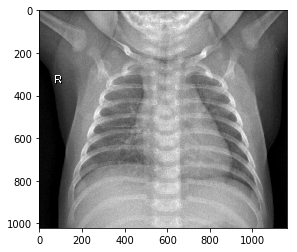

/content/chest_xray/train/PNEUMONIA/person37_bacteria_189.jpeg


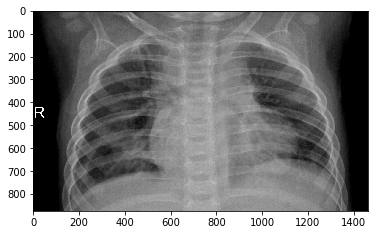

In [23]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




train_data = '/content/chest_xray/train'

for i in os.listdir(train_data):
  if not i.startswith('.'):
    img = random.choice(os.listdir(train_data + '/' + i))
    print(train_data + '/' + i + '/' + img)
    img=mpimg.imread(train_data + '/' + i + '/' + img)
    imgplot = plt.imshow(img, cmap='gray')
    plt.show()

# loading data in pytorch

In [0]:
import torch
import torchvision
from torchvision import transforms

train_data_path = '/content/chest_xray/train'

train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    
    
train_dataset = torchvision.datasets.ImageFolder(root=train_data_path, transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=600,num_workers=0,shuffle=True)

In [0]:
val_data_path = '/content/chest_xray/val'

val_transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    
    
val_dataset = torchvision.datasets.ImageFolder(root=val_data_path, transform=val_transform)
val_loader = torch.utils.data.DataLoader(val_dataset,batch_size=500,num_workers=0)

In [67]:
for img, l in train_loader:
  print(img.shape)
  break

torch.Size([500, 3, 224, 224])


# Model

In [0]:
plt.ion() 

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.show()
    plt.pause(0.001)  # pause a bit so that plots are updated

class_names = train_dataset.classes
# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [0]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


Epoch: 1/10  Training Loss: 0.583  Training Acc: 0.688  Test Loss: 0.978  Test Acc: 0.500
Validation loss decreased (inf --> 0.978481).  Saving model ...
Epoch: 2/10  Training Loss: 0.363  Training Acc: 0.848  Test Loss: 0.601  Test Acc: 0.562
Validation loss decreased (0.978481 --> 0.601077).  Saving model ...
Epoch: 3/10  Training Loss: 0.229  Training Acc: 0.923  Test Loss: 0.815  Test Acc: 0.562
Epoch: 4/10  Training Loss: 0.170  Training Acc: 0.938  Test Loss: 0.680  Test Acc: 0.688
Epoch: 5/10  Training Loss: 0.144  Training Acc: 0.948  Test Loss: 0.557  Test Acc: 0.688
Validation loss decreased (0.601077 --> 0.557271).  Saving model ...
Epoch: 6/10  Training Loss: 0.124  Training Acc: 0.955  Test Loss: 0.468  Test Acc: 0.688
Validation loss decreased (0.557271 --> 0.467622).  Saving model ...
Epoch: 7/10  Training Loss: 0.115  Training Acc: 0.956  Test Loss: 0.431  Test Acc: 0.750
Validation loss decreased (0.467622 --> 0.431136).  Saving model ...
Epoch: 8/10  Training Loss: 0.

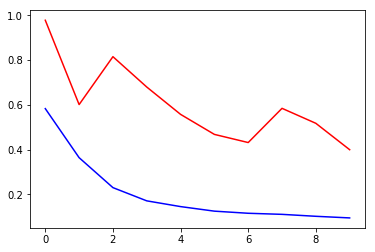

In [7]:

valid_loss_min = np.Inf
epochs = 10
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    tr_accuracy = 0
    for images, labels in train_loader:
        images = images.cuda()
        labels = labels.long().cuda()
        optimizer.zero_grad()
        
        log_ps  = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        tr_accuracy += torch.mean(equals.type(torch.FloatTensor))
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in val_loader:
                images = images.cuda()
                labels = labels.long().cuda()
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(val_loader))

        print("Epoch: {}/{} ".format(e+1, epochs),
              "Training Loss: {:.3f} ".format(train_losses[-1]),
              "Training Acc: {:.3f} ".format(tr_accuracy/len(train_loader)),
              "Test Loss: {:.3f} ".format(test_losses[-1]),
              "Test Acc: {:.3f}".format(accuracy/len(val_loader)))
        if test_loss/len(val_loader) <= valid_loss_min:
          print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
          valid_loss_min,
          test_loss/len(val_loader)))
          torch.save(model.state_dict(), 'best_model.pt')
          valid_loss_min = test_loss/len(val_loader)
        
plt.plot(train_losses, 'b', label='Training Loss')
plt.plot(test_losses, 'r', label='Validation Loss')
plt.show()